# Principal Component Analysis

## import library

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [45]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

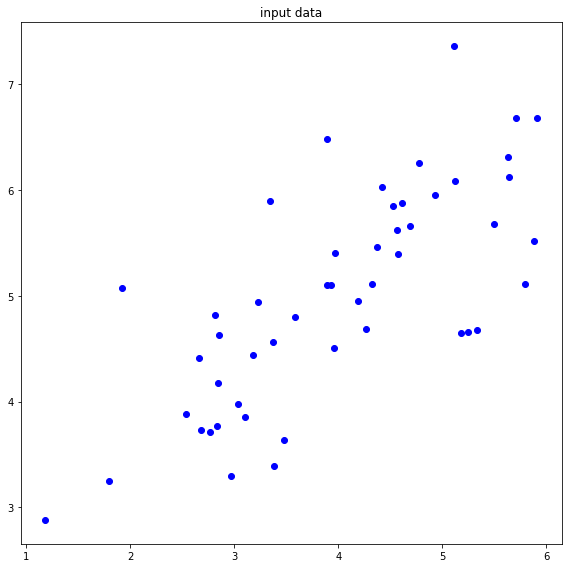

In [46]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [47]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # min구해서 빼고 나누기
    # m * n 에서 m1의 평균, m2 평균 구한 후 
    # xi^ = (xi - 평균) / 로x

    x = feature[:,0]
    y = feature[:,1]

    x = x - x.mean(axis=0)
    x = x / np.std(x, axis=0)

    y = y - y.mean(axis=0)
    y = y / np.std(y, axis=0)

    feature_normalize = np.genfromtxt(fname_data, delimiter=',')

    feature_normalize[:,0] = x
    feature_normalize[:,1] = y



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [48]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [49]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    Sigma = feature.T.dot(feature) / feature.shape[0]
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [50]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # sumU = ㅅu
    # 크기에 따라 sort한 후 1,2 구하기
    
    Sigma = compute_covariance(feature)

    (S, U)  = np.linalg.eig(Sigma) # s = eigen value, U = eigen vector
    idx     = S.argsort()[::-1] # decreasing order

    S = S[idx]
    U = U[idx]


    eigen_vector_1  = U[:,0]
    eigen_vector_2  = U[:,1]
    eigen_value_1   = S[0]
    eigen_value_2   = S[1]

    principal_component_1   = eigen_value_1 * eigen_vector_1
    principal_component_2   = eigen_value_2 * eigen_vector_2


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [51]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    scalar      = np.matmul(feature, vector) / np.dot(vector, vector)
    projection  = np.zeros(feature.shape)

    projection[:,0]  = scalar * vector[0]
    projection[:,1]  = scalar * vector[1]

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

## compute the principal components and the projection of feature

In [52]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

---

## functions for presenting the results

---

---

In [53]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [54]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    slope   = principal_component_1[1] / principal_component_1[0]
    grid_x  = np.linspace(min_x - 0.5, max_x + 0.5)
    value_y = grid_x * slope

    plt.scatter(x, y, c='blue')

    plt.scatter(x, y, c='blue')
    plt.plot(grid_x, value_y, color='red')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5) # plot 범위
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [55]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    s   = principal_component_1[1] / principal_component_1[0]
    grid_x  = np.linspace(min_x - 0.5, max_x + 0.5)
    val_y = grid_x * s

    plt.scatter(x, y, c='blue')
    plt.plot(grid_x, val_y, color='red')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [56]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    s   = principal_component_2[1] / principal_component_2[0]
    grid_x  = np.linspace(min_x - 0.5, max_x + 0.5)
    val_y = grid_x * s

    plt.scatter(x, y, c='blue')
    plt.plot(grid_x, val_y, color='red')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [57]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    s   = principal_component_1[1] / principal_component_1[0]
    grid_x  = np.linspace(min_x - 0.5, max_x + 0.5)
    val_y = grid_x * s

    plt.scatter(x, y, c='blue')
    plt.plot(grid_x, val_y, color='red')

    projection1 = compute_projection_onto_line(feature, principal_component_1)
    plt.plot(projection1[:,0], projection1[:,1], 'o', color='green')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [58]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    s   = principal_component_2[1] / principal_component_2[0]
    grid_x  = np.linspace(min_x - 0.5, max_x + 0.5)
    val_y = grid_x * s

    plt.scatter(x, y, c='blue')
    plt.plot(grid_x, val_y, color='red')


    projection2 = compute_projection_onto_line(feature, principal_component_2)
    plt.plot(projection2[:,0], projection2[:,1], 'o', color='green')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [59]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    s   = principal_component_1[1] / principal_component_1[0]
    grid_x  = np.linspace(min_x - 0.5, max_x + 0.5)
    val_y = grid_x * s

    plt.scatter(x, y, c='blue')
    plt.plot(grid_x, val_y, color='red')

    projection1 = compute_projection_onto_line(feature, principal_component_1)
    plt.plot(projection1[:,0], projection1[:,1], 'o', color='green')
    plt.plot([feature[:,0], projection1[:,0]], [feature[:,1], projection1[:,1]], '-', color='grey')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [60]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


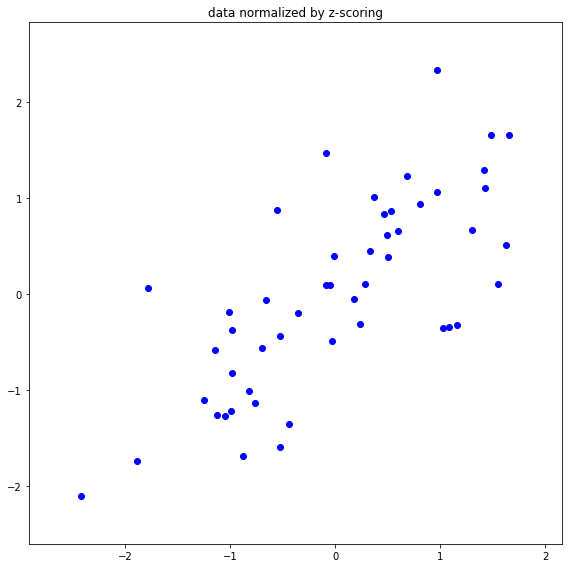

**************************************************
## [RESULT 02]
**************************************************


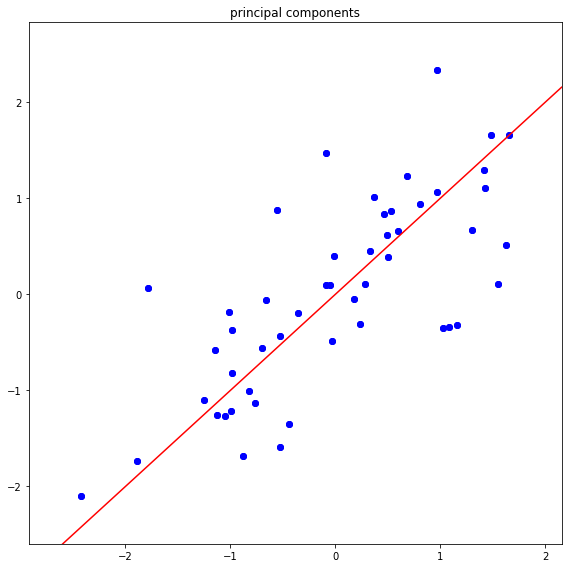

**************************************************
## [RESULT 03]
**************************************************


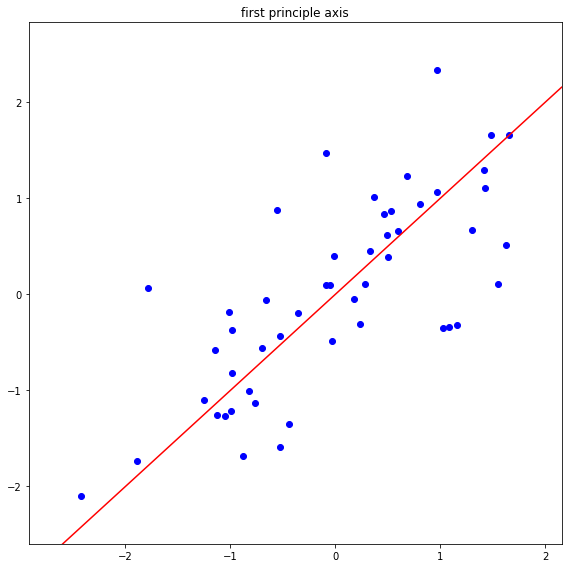

**************************************************
## [RESULT 04]
**************************************************


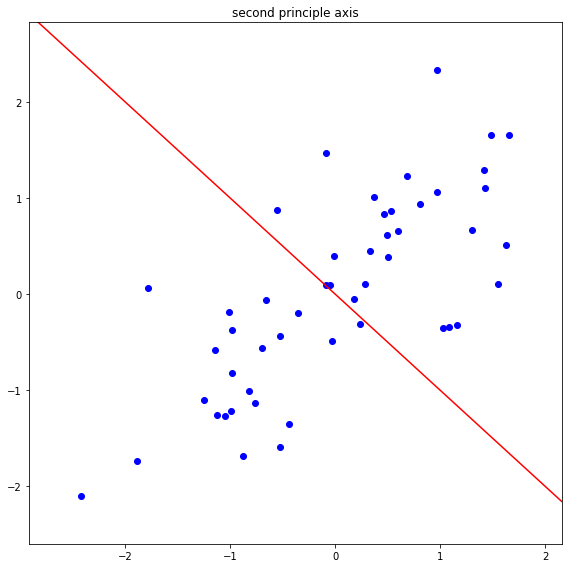

**************************************************
## [RESULT 05]
**************************************************


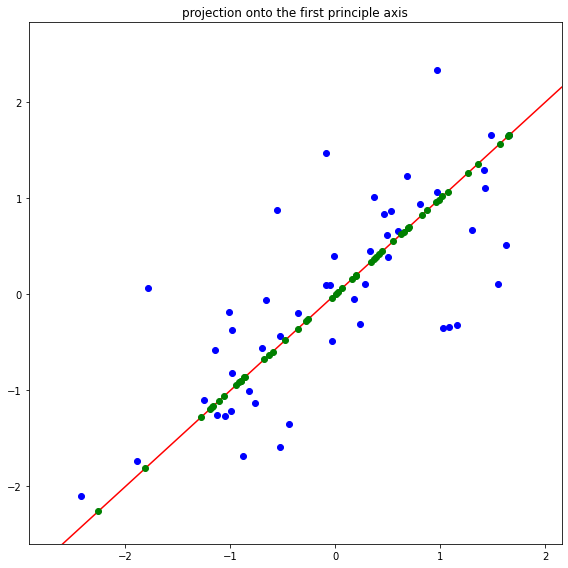

**************************************************
## [RESULT 06]
**************************************************


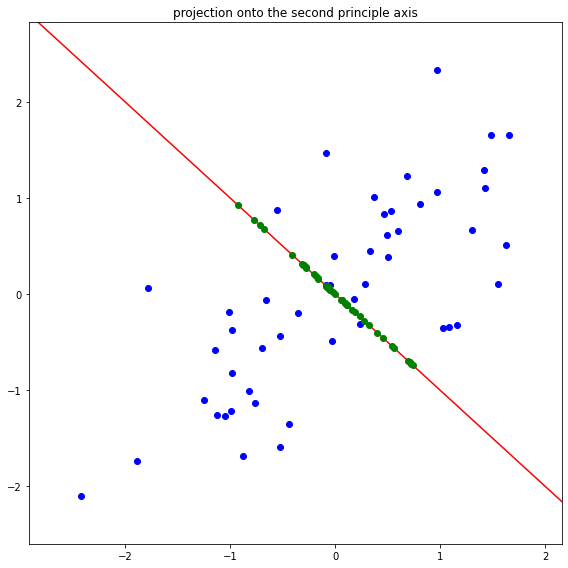

**************************************************
## [RESULT 07]
**************************************************


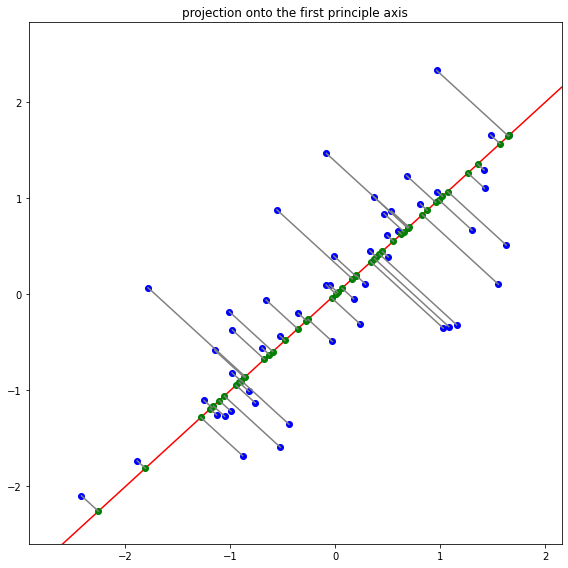

**************************************************
## [RESULT 08]
**************************************************


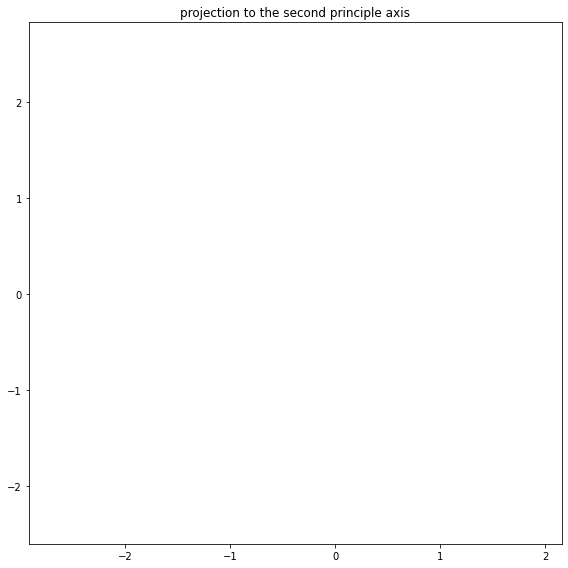

In [61]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)